Рівненська
[[0.12156863 0.46666667 0.70588235 1.        ]]
[[1.         0.49803922 0.05490196 1.        ]]
[[0.17254902 0.62745098 0.17254902 1.        ]]
[[0.83921569 0.15294118 0.15686275 1.        ]]
[[0.58039216 0.40392157 0.74117647 1.        ]]
[[0.54901961 0.3372549  0.29411765 1.        ]]
[[0.89019608 0.46666667 0.76078431 1.        ]]
[[0.49803922 0.49803922 0.49803922 1.        ]]


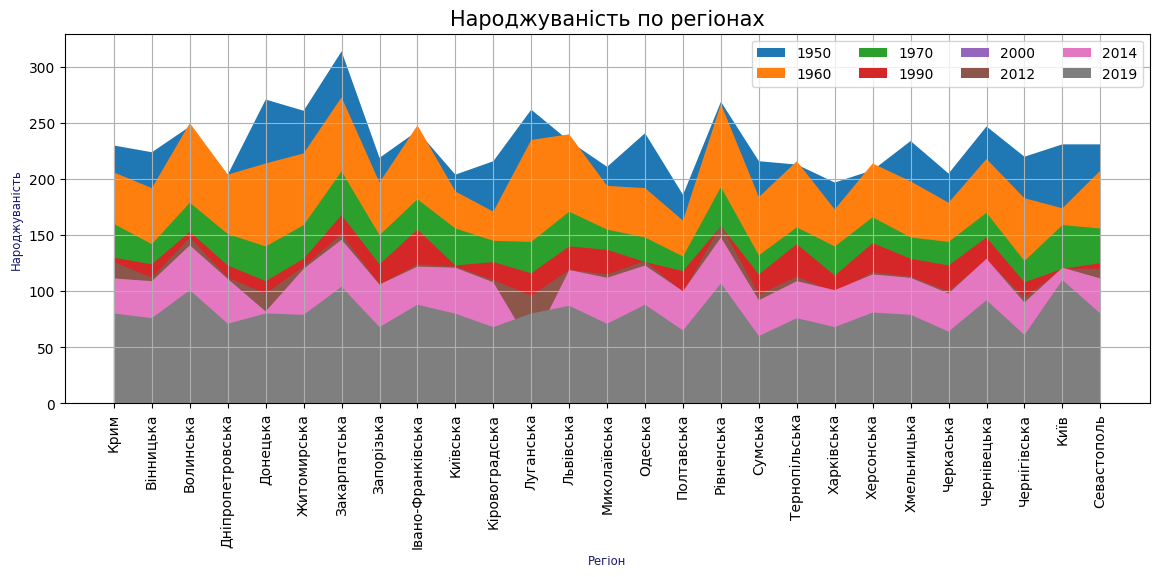

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Читайтаю дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" 
table_UP = pd. read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8')
tabel = table_UP[12]
df = pd.DataFrame(tabel)

# Замінюю '—' на NaN
df.loc[df['2014'] == '—', '2014'] = 'NaN'
df.loc[df['2019'] == '—', '2019'] = 'NaN'

# Змінюю тип данних на числовий останніх 2-х стовбців 
df[df.columns[7:]] = df[df.columns[7:]].astype('float64')

# Рахую кількість NaN у кожному стовбці
df.isnull().sum()

# Видаляю останній рядок Датафрейму
df = df.iloc[: -1]

# Замінюю усі NaN на середнє значення стовбця
df = df.apply(lambda x: x.fillna(x.mean()) if x.isna().any() else x)

# Список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
df['Регіон'][df['2019'] > df['2019'].mean()]

# Регіон з найвищьою народжуваністю у 2014 році
print(df['Регіон'][df['2014'].idxmax()])

# Візуалізація
colnames = df.columns[1:]

f, ax = plt.subplots()
f.set_figwidth(14)

for col in colnames:
  ax2 = ax.stackplot(df["Регіон"],df[col], labels=[col])
  color = ax2[0].get_facecolor()
  print(color)

plt.xticks(rotation=90)
plt.legend(loc='best', ncols=colnames.size/2)
plt.grid()
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність по регіонах", fontsize=15)
plt.show()